# Feature engineering

In [46]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./main_df.csv')
df.drop(columns='track_id', inplace=True)
df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,...,Reggae,Reggaeton,Jazz,Rock,Ska,Comedy,Soul,Soundtrack,World,is_popular
0,0.2340,0.617,169173,0.862,0.976000,G,0.1410,-12.855,Major,0.0514,...,0,0,0,0,0,0,0,0,0,0
1,0.2490,0.518,130653,0.805,0.000000,F,0.3330,-6.248,Major,0.0407,...,0,0,0,0,0,0,0,0,0,0
2,0.3660,0.631,357573,0.513,0.000004,D,0.1090,-6.376,Major,0.0293,...,1,0,0,0,0,0,0,0,0,0
3,0.8150,0.768,104924,0.137,0.922000,C#,0.1130,-13.284,Minor,0.0747,...,0,0,1,0,0,0,0,0,0,0
4,0.1310,0.748,188491,0.627,0.000000,G,0.0852,-6.029,Major,0.0644,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,0.4000,0.851,251267,0.790,0.230000,C,0.1230,-4.641,Minor,0.0309,...,0,0,1,0,0,0,0,0,0,0
176770,0.9730,0.538,266933,0.144,0.177000,G#,0.3590,-17.711,Major,0.0569,...,0,0,1,0,0,0,0,0,0,0
176771,0.1130,0.716,228493,0.806,0.000000,G,0.1510,-5.913,Minor,0.1350,...,0,1,0,0,0,0,0,0,0,0
176772,0.2170,0.664,267960,0.537,0.000003,D,0.1180,-6.000,Major,0.0290,...,0,0,0,0,0,0,0,0,0,1


## Features creation

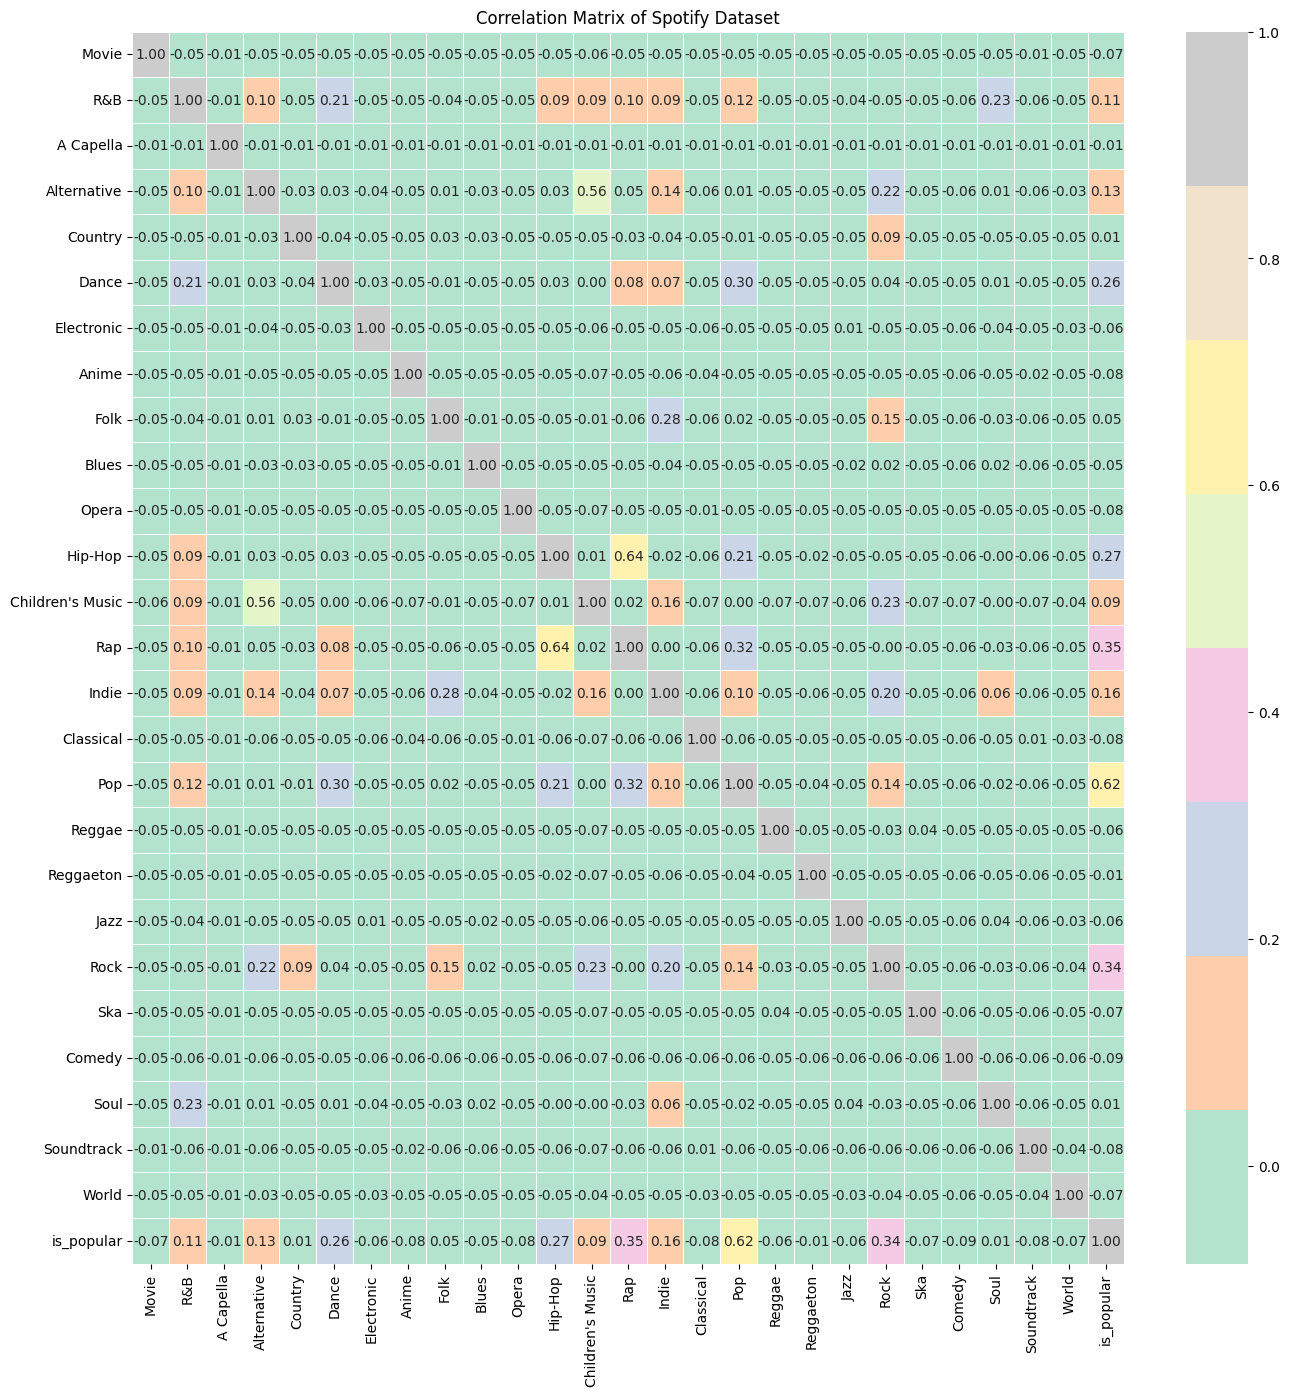

In [13]:
numerical_columns = df [ [
    'Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance', 'Electronic', 
    'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop', "Children's Music", 'Rap', 
    'Indie', 'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska', 
    'Comedy', 'Soul', 'Soundtrack', 'World', 'is_popular'
]]
cor = numerical_columns.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(cor, annot=True, cmap='Pastel2', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spotify Dataset')
plt.show()


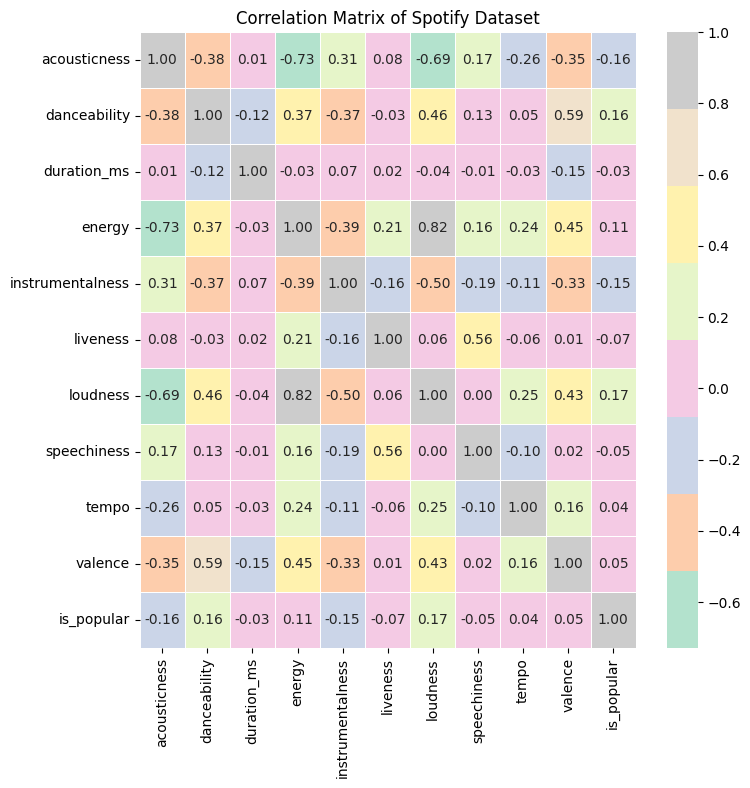

In [14]:
numerical_columns = df [ [
    'acousticness', 'danceability', 'duration_ms', 'energy', 
    'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'valence', 'is_popular'
]]
cor = numerical_columns.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(cor, annot=True, cmap='Pastel2', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spotify Dataset')
plt.show()


In [47]:
# Create an empty dictionary to hold new features
new_features = {}
corr_matrix = df.select_dtypes(include='number').corr()

# Iterate over the correlation matrix to find pairs with high correlation
for col1 in corr_matrix.columns:
    if col1 != 'is_popular':
        for col2 in corr_matrix.columns:
            if col2 != 'is_popular':
                if col1 != col2:
                    corr_value = corr_matrix.at[col1, col2]
                    if abs(corr_value) > 0.2:
                        new_feature_name = f'{col1}_{col2}'
                        if f'{col1}_{col2}' and f'{col2}_{col1}' not in new_features.keys():
                            new_features[new_feature_name] = df[col1] * df[col2]

# Add new features to the original DataFrame
df = df.assign(**new_features)

In [16]:
numerical_columns = df.select_dtypes(include=['number'])
cor = numerical_columns.corr().is_popular
cor.sort_values(ascending=False)[1:20]

Pop                             0.616384
Rap_Pop                         0.363114
Rap                             0.350480
Rock                            0.340786
Dance_Pop                       0.332043
Hip-Hop_Pop                     0.313566
Hip-Hop_Rap                     0.281887
Hip-Hop                         0.272539
danceability_Hip-Hop            0.272170
Dance                           0.259480
Children's Music_Rock           0.195017
Alternative_Rock                0.178224
loudness                        0.169640
acousticness_loudness           0.166412
Indie                           0.157808
danceability                    0.155444
Alternative_Children's Music    0.152470
danceability_energy             0.149758
loudness_tempo                  0.145870
Name: is_popular, dtype: float64

In [49]:
#splitting the data to training and test sets in order to be able to measure performance
from sklearn.model_selection import train_test_split
y=df['is_popular']
X=df.drop(['is_popular'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train.shape

(123741, 92)

## Transform Categorical columns

In [54]:
#One hot encoding the dataframes
from sklearn.preprocessing import OneHotEncoder

#define categorical columns
cat_cols = ['key', 'mode', 'time_signature']
encoder=OneHotEncoder(sparse=False, drop='first')
#Training set
data_ohe_train = encoder.fit_transform(X_train[cat_cols])
df_ohe_train = pd.DataFrame(data_ohe_train, columns=encoder.get_feature_names_out(cat_cols), index=X_train.index)

#Testing set
data_ohe_test = encoder.transform(X_test[cat_cols])
df_ohe_test = pd.DataFrame(data_ohe_test, columns=encoder.get_feature_names_out(cat_cols), index=X_test.index)
#merging OHE columns with numerical columns
X_train = pd.concat([X_train.drop(cat_cols, axis=1), df_ohe_train], axis=1)
X_test = pd.concat([X_test.drop(cat_cols, axis=1), df_ohe_test], axis=1)
X_train.tail()

c:\Users\ACER\miniconda3\envs\face\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_E,key_F,key_F#,key_G,key_G#,mode_Minor,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
119879,0.23100,0.461,326680,0.252,0.000084,0.106,-17.082,0.2740,74.768,0.481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
103694,0.00571,0.309,201947,0.820,0.000368,0.159,-4.844,0.0636,174.762,0.399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131932,0.01210,0.691,265587,0.834,0.001480,0.115,-4.378,0.0432,129.982,0.330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146867,0.35500,0.364,224387,0.733,0.000007,0.981,-5.071,0.0299,145.394,0.244,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
121958,0.01190,0.478,211800,0.695,0.000000,0.119,-5.923,0.0529,89.801,0.297,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Scale Data

In [20]:
#Using Standard Scaler to scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Model

In [21]:
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, recall_score, precision_score, accuracy_score
import numpy as np 
def classification(y_true, y_pred,x, clf):
    """This function shows the classification report,
    the confusion matrix as well as the ROC curve for evaluation of model quality.
    
    y_true: Correct y values, typically y_test that comes from the train_test_split performed at the beginning of model development.
    y_pred: Predicted y values by the model.
    clf: classifier model that was fit to training data.
    X: X_test values"""
    
    #Classification report
    print("CLASSIFICATION REPORT")
    print("------------------------------------------")
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    #Plotting the normalized confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=clf.classes_)
    disp.plot()
    plt.show()

## Random Forest

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     47002
           1       0.78      0.61      0.69      6031

    accuracy                           0.94     53033
   macro avg       0.87      0.80      0.83     53033
weighted avg       0.93      0.94      0.93     53033



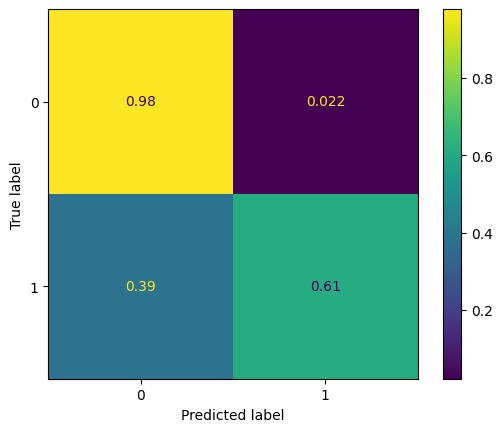

In [552]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=None, 
                                      min_samples_leaf=2, class_weight='balanced', 
                                      random_state=42)
clf_rf.fit(X_train, y_train)

#Making predictions and evaluation.
y_pred = clf_rf.predict(X_test)
classification(y_test, y_pred, X_test, clf_rf)


In [553]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.6129995025700548, 0.7827651916154986, 0.9366432221447023)

## XBG Classifier

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     47002
           1       0.82      0.57      0.67      6031

    accuracy                           0.94     53033
   macro avg       0.88      0.78      0.82     53033
weighted avg       0.93      0.94      0.93     53033



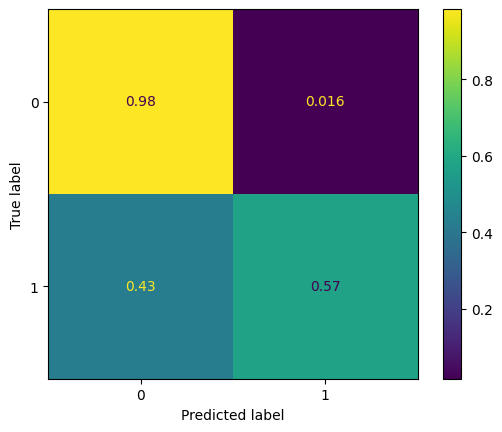

In [63]:
clf_xgb  = XGBClassifier(base_score= 0.2, booster = 'gbtree', gamma= 0, learning_rate = 0.1,
                         n_estimators =  500,  reg_alpha =  0, reg_lambda = 1,
                         random_state=42)


clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
classification(y_test, y_pred, X_test, clf_xgb)

In [64]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.5732051069474382, 0.8168714555765595, 0.9368506401674429)

In [65]:
import pickle
# save the model to disk
filename = 'model_xgb.pkl'
pickle.dump(clf_xgb, open(filename, 'wb')) 

## Logic

CLASSIFICATION REPORT
------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     47002
           1       0.47      0.86      0.61      6031

    accuracy                           0.87     53033
   macro avg       0.73      0.87      0.77     53033
weighted avg       0.92      0.87      0.89     53033



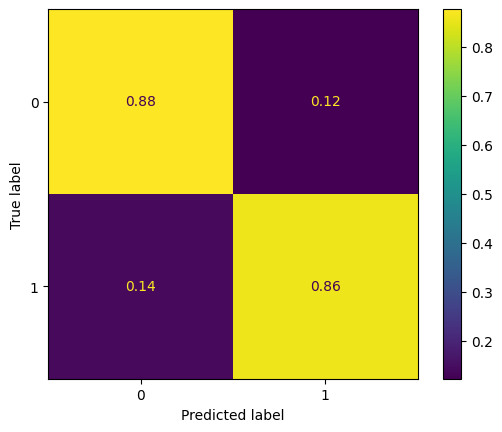

In [579]:
clf_logregcv_tuned = LogisticRegressionCV(cv=5, class_weight='balanced',
                                          penalty='l2', solver='liblinear',
                                          random_state=42)
clf_logregcv_tuned.fit(X_train,  y_train)
y_pred = clf_logregcv_tuned.predict(X_test)
classification(y_test, y_pred, X_test, clf_logregcv_tuned)

In [580]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred), accuracy_score(y_test, y_pred)

(0.8590615155032333, 0.4722450095706864, 0.8747949390002451)